#**2 Worked Example**

#**Problem:  How can we validate Credit Card datasets of customers and validate fraud to ensure their consistency and integrity, using logistic regression?**


Each transaction is labeled as either fraudulent (Class = 1) or not fraudulent (Class = 0). The task is to build a machine learning model that can accurately detect fraudulent transactions based on the given features.

**Input Format:**
- A CSV file containing transaction data with the following columns:
  - Time: Timestamp of the transaction
  - V1, V2, ..., V28: Numerical features representing transaction details (masked due to privacy concerns)
  - Amount: Transaction amount
  - Class: Binary label (0 for non-fraudulent, 1 for fraudulent)

**Output Format:**
- A binary classification model that can predict whether a given transaction is fraudulent (1) or not (0).

**Sample Inputs and Outputs:**

Input:
- A dataset containing transaction data.

Output:
- A trained binary classification model (e.g., Logistic Regression, Random Forest, or any other suitable algorithm).

**Constraints:**
- The dataset may contain missing values, and these need to be handled appropriately.
- The dataset may have class imbalance, so appropriate techniques for handling imbalanced data should be used.
- Accuracy, precision, recall, and F1-score should be considered as evaluation metrics for the model.
- The model should be scalable and capable of handling large datasets efficiently.



**Proof of Correctness:**

- The correctness of the solution can be validated by assessing the model's performance on a held-out test dataset. Metrics such as accuracy, precision, recall, and F1-score will be used to determine the model's effectiveness in detecting fraudulent transactions.


**Goal -**

The goal of credit scoring models is to predict the creditworthiness of a customer and determine whether they will be able to meet a given financial obligation or default on it.

Such models allow a financial institution to minimize the risk of loss by setting decision rules regarding which customers receive loan and credit card approvals.

Logistic regression can be used to predict default events and model the influence of different variables on a consumer’s creditworthiness. In this paper we use a logistic regression model to predict the creditworthiness of bank customers using predictors related to their personal status and financial history.

Model adequacy and robustness checks are performed to ensure that the model is being properly
fitted and interpreted.

Undergoing Pre-Processing

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Inconsisten

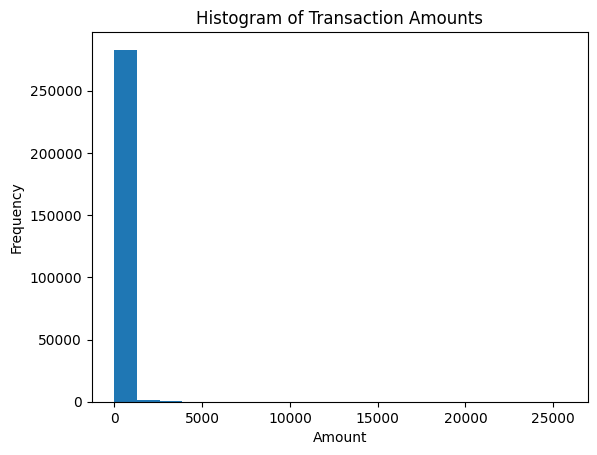

In [25]:
import pandas as pd
df = pd.read_csv('/content/creditcard.csv')

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

data_types = df.dtypes
print("\nData Types:\n", data_types)

# Consistency Checks
inconsistent_amounts = df[df['Amount'] < 0]
print("\nInconsistent Amounts:\n", inconsistent_amounts)

# Data Validation
date_validation = ((df['Time'] >= 0) & (df['Time'] <= 86400))
print("\nDate Validation:\n", date_validation.value_counts())

# Data Summary Statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Visualization
import matplotlib.pyplot as plt
plt.hist(df['Amount'], bins=20)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Data Transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

df.to_csv('processed_dataset.csv', index=False)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

**How to make the data more accurate and balanced for validation and prediction:**
- Data Preprocessing: Handling missing values, scaling features.
- Classification Algorithms: Logistic Regression, Random Forest, etc.
- Evaluation Metrics: Accuracy, precision, recall, F1-score.
- Imbalanced Data Handling: Dealing with class imbalance.


**Algorithmic Concepts:**
- Binary Classification: The problem focuses on binary classification, a fundamental concept in machine learning.
- Data Preprocessing: Handling missing values and feature scaling are crucial for model performance.
- Imbalanced Data Handling: Dealing with class imbalance is a common challenge in fraud detection.
- Model Evaluation: Using metrics like accuracy, precision, recall, and F1-score to assess model performance.



0    284315
1       492
Name: Class, dtype: int64


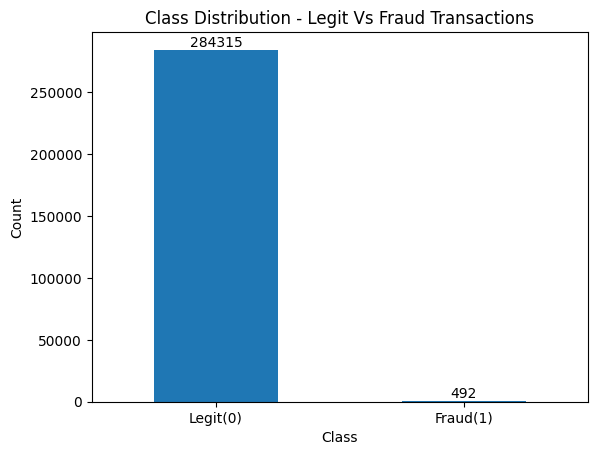

In [26]:
#Counting the number of legit and fraud transactions in the Class Column
credit_card_ds = pd.read_csv('creditcard.csv')
import matplotlib.pyplot as plt

value_counts = credit_card_ds['Class'].value_counts()
print(value_counts)
bar = value_counts.plot.bar()
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution - Legit Vs Fraud Transactions')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

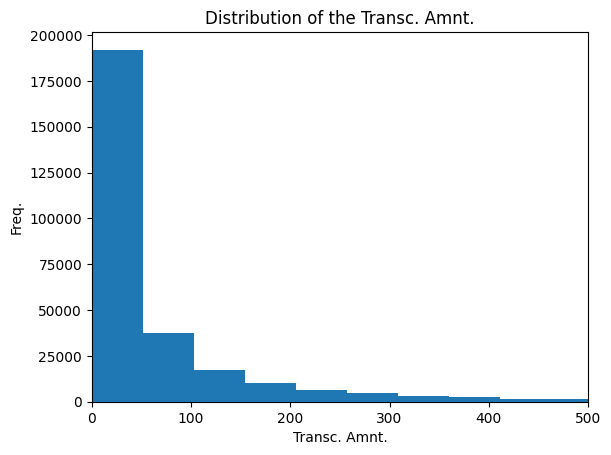

In [13]:
#Plotting histogram across Amount to check the distribution
plt.hist(credit_card_ds['Amount'], bins=500)
plt.xlabel('Transc. Amnt.')
plt.ylabel('Freq.')
plt.title('Distribution of the Transc. Amnt.')
plt.xlim(0, 500)
plt.show()

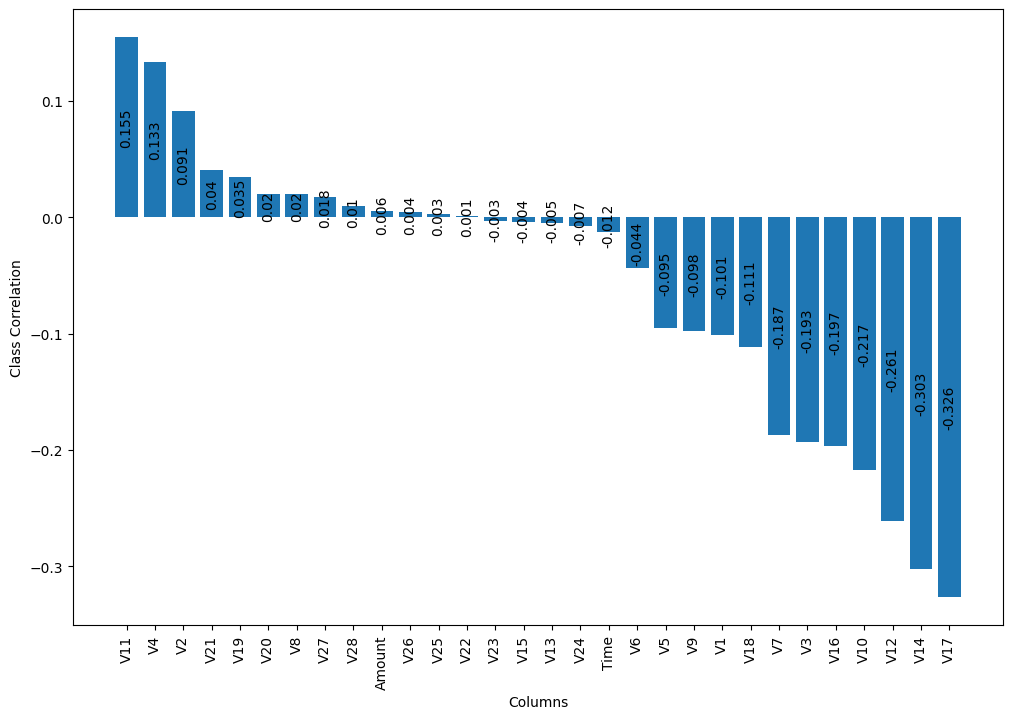

In [27]:
corr = credit_card_ds.corr()['Class']
corr = corr.drop(['Class'])

corr_sorted = corr.sort_values(ascending=False)

plt.figure(figsize=(12,8))
bars = plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Class Correlation')
plt.bar_label(bars, labels=corr_sorted.values.round(3), label_type='center', rotation=90)

plt.show()

<ipython-input-19-01d1e3e6041f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(credit_card_ds['Amount'].values)


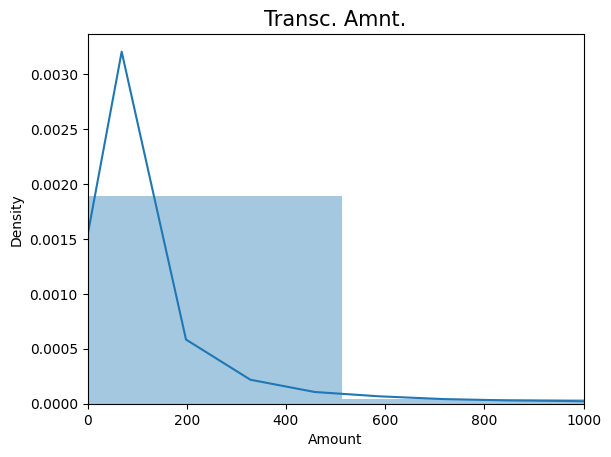

In [19]:
#Distribution of Amount
import seaborn as sbn
sbn.distplot(credit_card_ds['Amount'].values)
plt.title('Transc. Amnt.', fontsize=15)
plt.xlim([min(credit_card_ds['Amount'].values),1000])
plt.xlabel('Amount')

plt.show()

Text(0, 0.5, 'Skewness')

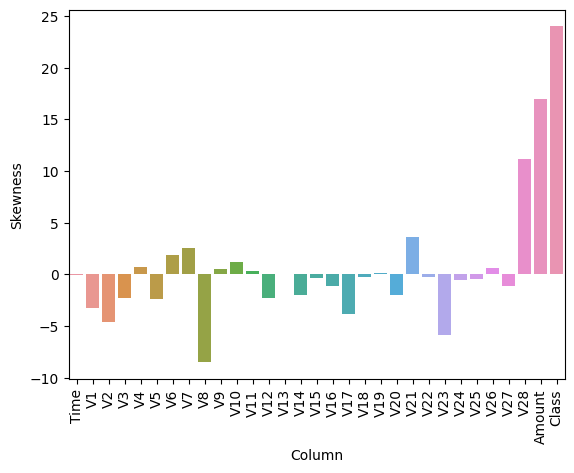

In [20]:
import pandas as pd
import seaborn as sbn
data = pd.read_csv('creditcard.csv')
skewness = data.skew()
skew_plt = sbn.barplot(x=skewness.index, y=skewness.values)
skew_plt.set_xticklabels(skew_plt.get_xticklabels(), rotation=90)
skew_plt.set_xlabel('Column')
skew_plt.set_ylabel('Skewness')



#**How did we improve the credit card fraud detection dataset and how we can validate the data:**


**1. Handling Missing Values:**

**2. Dealing with Class Imbalance:**
   - Dataset has a significant class imbalance issue, we can implement techniques like oversampling the minority class or using anomaly detection methods to balance the classes. This can help our model better identify fraudulent transactions.

**3. Choosing the Right Algorithm:**
   - The choice of machine learning algorithm depends on our dataset characteristics. We implement algorithms such as Logistic Regression, Random Forest, Gradient Boosting, and support vector machines to see which one performs best for our specific problem.

**4. Evaluation Metrics:**
   - To validate the data, we should use appropriate evaluation metrics such as precision, recall, F1-score, and AUC. These metrics provide a clear understanding of how well our model is performing in identifying fraudulent transactions.

**5. Cross-Validation:**
   - We can Implement cross-validation to assess our model's performance on different subsets of our data. This helps ensure that our model generalizes well to unseen data and gives us a better estimate of its real-world performance.

**7. Feature Engineering:**
   - We  perform feature engineering to create new features or transform existing ones. This helps our model capture important patterns in the data and improve its performance.

**8. Regularization:**
   - For logistic regression or linear models, regularization can help prevent overfitting. We can experiment with different regularization strengths (e.g., L1 and L2 regularization) to find the optimal balance between bias and variance.

**9. Data Validation:**
   - Data validation involves checking the consistency and correctness of our data. This includes verifying that column names and data types are as expected, ensuring that there are no missing values or duplicates, and confirming that the data distribution aligns with our domain knowledge.


By following these steps and techniques, we can improve our data quality and validate our models effectively, leading to a more **robust credit card fraud detection system**.

It's essential to iterate through these steps, fine-tune  approach, and continuously monitor and update the model as new data becomes available to maintain its accuracy.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df.fillna(0, inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1-Score: 0.6951219512195121


These metrics are used to assess the performance of the logistic regression model in classifying fraudulent transactions.

These values provide insights into how well the model is performing in identifying and validating fraudulent transactions in creidt card data.

The provided evaluation metrics for our logistic regression model on the test data are as follows:

- Accuracy: 0.9991
- Precision: 0.8636
- Recall: 0.5816
- F1-Score: 0.6951

Here's what we can conclude from these metrics:

1. **High Accuracy:** The model has a very high accuracy score, indicating that it correctly classifies the majority of transactions (both fraudulent and non-fraudulent).

2. **Moderate Precision:** Precision is a measure of how many of the predicted fraud cases are actually fraudulent.This is a good precision score, indicating that false positives (legitimate transactions mistakenly classified as fraudulent) are relatively low.

3. **Moderate Recall:** A recall score of 0.5816 means that the model is capturing approximately 58.16% of the actual fraudulent transactions. While this is not exceptionally high, it indicates that the model is still able to detect a significant portion of fraud cases.

4. **F1-Score:** It provides a balance between the two metrics. An F1-Score of 0.6951 suggests that the model achieves a reasonable balance between precision and recall. It's often used when there's an imbalance between the classes (which is common in fraud detection).

In conclusion, the logistic regression model performs well in terms of accuracy and precision, indicating that it correctly identifies a high percentage of fraudulent transactions while keeping false positives relatively low.

#**Conclusion -**

The quality of the data depends on the context and the specific goals of our project. Based on the evaluation metrics provided for logistic regression model, we can conclude the following:

1. **Accuracy and Precision**: High Score suggests that the data is good for detecting non-fraudulent transactions accurately and minimizing false positives.

2. **Recall**: The recall score, while not as high as accuracy and precision, is still moderate data is good.

3. **F1-Score**: The F1-Score, which balances precision and recall, is also reasonable. It suggests that data model achieves a balance between minimizing false positives and capturing actual fraud cases.

In summary, the data appears to be good for the purpose of credit card fraud detection, especially for the primary goal is to minimize false positives (i.e., legitimate transactions being flagged as fraudulent).

Additionally, the data quality assessment also considers aspects such as data completeness, consistency, and representativeness.